In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.svm import SVR
from itertools import product
from minesweeper import Minesweeper

In [39]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X_train, X_test, y_train, y_test = train_test_split(*make_classification(n_samples=10000,n_features=200))

In [41]:
parameter_space = {
    'n_estimators':{'range':[1,6]},
    'alpha':{'range':[0,1]},
    'max_depth':{'range':[4,10], 'func': lambda λ: 4*int(λ//4)},
#                   'min_samples_split':{'range':[2,100],'func':int},
    'max_features':{'range':[0,1], 'func': lambda λ:'sqrt' if λ>.5 else 'log2'}
#                   'min_samples_leaf':[2,200],
                  }
  

In [42]:
parameter_space

{'n_estimators': {'range': [1, 6]},
 'alpha': {'range': [0, 1]},
 'max_depth': {'range': [4, 10], 'func': <function __main__.<lambda>(λ)>},
 'max_features': {'range': [0, 1], 'func': <function __main__.<lambda>(λ)>}}

In [43]:
ms = Minesweeper(parameter_space, verbose=True)

In [44]:
ms.casting_functions

{'n_estimators': int,
 'alpha': float,
 'max_depth': <function __main__.<lambda>(λ)>,
 'max_features': <function __main__.<lambda>(λ)>}

In [45]:
score = 0
while True:
    
    parameters = ms.get_parameters()
    if parameters == None: break
    print(parameters)
    
#     rfc = RFC(**parameters, n_jobs=-1).fit(X_train,y_train)
#     score = f1_score(y_test, rfc.predict(X_test))
    score +=1
    print(score)
    ms.update_values(parameters, score)
ms.df

{'n_estimators': 5, 'alpha': 0.5, 'max_depth': 8, 'max_features': 'log2'}
1
{'n_estimators': 3, 'alpha': 0.8333333333333333, 'max_depth': 4, 'max_features': 'sqrt'}
2
{'n_estimators': 5, 'alpha': 0.16666666666666666, 'max_depth': 4, 'max_features': 'log2'}
3
{'n_estimators': 1, 'alpha': 0.16666666666666666, 'max_depth': 4, 'max_features': 'log2'}
4
{'n_estimators': 1, 'alpha': 0.8333333333333333, 'max_depth': 8, 'max_features': 'log2'}
5
{'n_estimators': 3, 'alpha': 0.16666666666666666, 'max_depth': 4, 'max_features': 'sqrt'}
6
{'n_estimators': 1, 'alpha': 0.8333333333333333, 'max_depth': 4, 'max_features': 'log2'}
7
{'n_estimators': 5, 'alpha': 0.8333333333333333, 'max_depth': 4, 'max_features': 'log2'}
8
increasing b to 4
{'n_estimators': 4, 'alpha': 0.875, 'max_depth': 4, 'max_features': 'sqrt'}
9
{'n_estimators': 2, 'alpha': 0.375, 'max_depth': 4, 'max_features': 'log2'}
10
{'n_estimators': 2, 'alpha': 0.625, 'max_depth': 8, 'max_features': 'sqrt'}
11
{'n_estimators': 4, 'alpha': 0

{'n_estimators': 1, 'alpha': 0.7857142857142856, 'max_depth': 4, 'max_features': 'log2'}
86
Already done
{'n_estimators': 4, 'alpha': 0.07142857142857142, 'max_depth': 8, 'max_features': 'sqrt'}
87
Already done
{'n_estimators': 4, 'alpha': 0.07142857142857142, 'max_depth': 4, 'max_features': 'log2'}
88
{'n_estimators': 2, 'alpha': 0.7857142857142856, 'max_depth': 8, 'max_features': 'sqrt'}
89
{'n_estimators': 5, 'alpha': 0.9285714285714286, 'max_depth': 4, 'max_features': 'log2'}
90
Already done
Already done
{'n_estimators': 2, 'alpha': 0.9285714285714286, 'max_depth': 4, 'max_features': 'sqrt'}
91
Already done
Already done
{'n_estimators': 2, 'alpha': 0.3571428571428571, 'max_depth': 8, 'max_features': 'sqrt'}
92
{'n_estimators': 2, 'alpha': 0.6428571428571428, 'max_depth': 4, 'max_features': 'log2'}
93
Already done
{'n_estimators': 5, 'alpha': 0.6428571428571428, 'max_depth': 4, 'max_features': 'sqrt'}
94
Already done
{'n_estimators': 5, 'alpha': 0.07142857142857142, 'max_depth': 8, 

KeyboardInterrupt: 

In [47]:
ms.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   n_estimators  179 non-null    float64
 1   alpha         179 non-null    float64
 2   max_depth     179 non-null    float64
 3   max_features  179 non-null    float64
 4   score         179 non-null    float64
dtypes: float64(5)
memory usage: 7.1 KB


In [48]:
ms.history

,n_estimators,alpha,max_depth,max_features,score
0,5,0.500000,8,log2,1
1,3,0.833333,4,sqrt,2
2,5,0.166667,4,log2,3
3,1,0.166667,4,log2,4
4,1,0.833333,8,log2,5
...,...,...,...,...,...
98,4,0.071429,4,sqrt,99
99,2,0.357143,4,log2,100
100,3,0.071429,4,log2,101
101,1,0.357143,4,sqrt,102


In [49]:
ms.history.sort_values(by=list(ms.history.columns[:-1]))

,n_estimators,alpha,max_depth,max_features,score
97,1,0.071429,4,sqrt,98
55,1,0.083333,4,log2,56
41,1,0.083333,8,sqrt,42
36,1,0.100000,4,log2,37
13,1,0.125000,4,sqrt,14
...,...,...,...,...,...
47,5,0.916667,4,log2,48
44,5,0.916667,4,sqrt,45
64,5,0.916667,8,log2,65
56,5,0.916667,8,sqrt,57


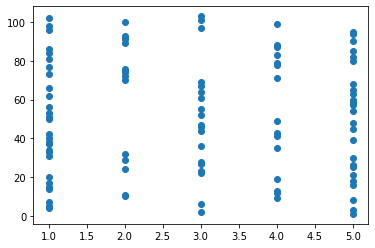

In [50]:
plt.scatter(ms.history.iloc[:,0], ms.history.score)

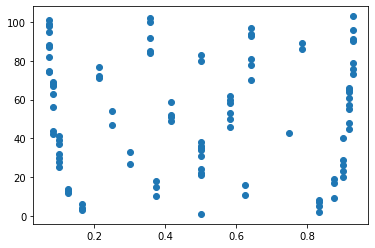

In [51]:
plt.scatter(ms.history.iloc[:,1], ms.history.score)

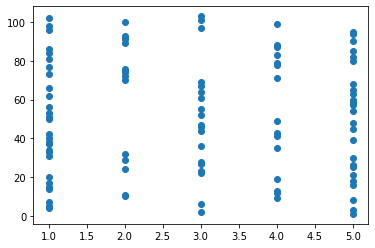

In [52]:
plt.scatter(ms.history.iloc[:,0], ms.history.score)

In [13]:
ms.df

,n_estimators,max_depth,max_features,score
0,0.500000,0.500000,0.500000,1.0
1,0.166667,0.166667,0.833333,2.0
2,0.166667,0.833333,0.833333,3.0
3,0.833333,0.833333,0.833333,4.0
4,0.833333,0.833333,0.166667,5.0
...,...,...,...,...
553,0.750000,0.321429,0.535714,16.0
554,0.464286,0.464286,0.821429,11.0
555,0.321429,0.321429,0.821429,17.0
556,0.821429,0.321429,0.321429,6.0


In [14]:
ms.previous_values

{"{'n_estimators': 3, 'max_depth': 4, 'max_features': 'log2'}": {'values': [{'n_estimators': 0.5,
    'max_depth': 0.5,
    'max_features': 0.5},
   {'n_estimators': 0.5, 'max_depth': 0.1, 'max_features': 0.5},
   {'n_estimators': 0.5, 'max_depth': 0.1, 'max_features': 0.1},
   {'n_estimators': 0.5, 'max_depth': 0.5, 'max_features': 0.1},
   {'n_estimators': 0.4375, 'max_depth': 0.3125, 'max_features': 0.1875},
   {'n_estimators': 0.5625, 'max_depth': 0.1875, 'max_features': 0.3125},
   {'n_estimators': 0.5625, 'max_depth': 0.3125, 'max_features': 0.0625},
   {'n_estimators': 0.5625, 'max_depth': 0.3125, 'max_features': 0.3125},
   {'n_estimators': 0.4375, 'max_depth': 0.1875, 'max_features': 0.3125},
   {'n_estimators': 0.4375, 'max_depth': 0.4375, 'max_features': 0.1875},
   {'n_estimators': 0.5625, 'max_depth': 0.0625, 'max_features': 0.3125},
   {'n_estimators': 0.4375, 'max_depth': 0.3125, 'max_features': 0.0625},
   {'n_estimators': 0.4375, 'max_depth': 0.1875, 'max_features': 0.

In [15]:
ms.history

,n_estimators,max_depth,max_features,score
0,3,4,log2,1
1,1,4,sqrt,2
2,1,8,sqrt,3
3,5,8,sqrt,4
4,5,8,log2,5
5,5,4,log2,6
6,1,4,log2,7
7,5,4,sqrt,8
8,1,8,log2,9
9,2,4,log2,10


In [27]:
ms.bins

array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
       1.        ])

In [31]:
data = ms.mms.inverse_transform(ms.bins.reshape(-1,1)*np.ones(ms.dimensions))
data

array([[ 1.        ,  4.        ,  0.        ],
       [ 1.33333333,  4.4       ,  0.06666667],
       [ 1.66666667,  4.8       ,  0.13333333],
       [ 2.        ,  5.2       ,  0.2       ],
       [ 2.33333333,  5.6       ,  0.26666667],
       [ 2.66666667,  6.        ,  0.33333333],
       [ 3.        ,  6.4       ,  0.4       ],
       [ 3.33333333,  6.8       ,  0.46666667],
       [ 3.66666667,  7.2       ,  0.53333333],
       [ 4.        ,  7.6       ,  0.6       ],
       [ 4.33333333,  8.        ,  0.66666667],
       [ 4.66666667,  8.4       ,  0.73333333],
       [ 5.        ,  8.8       ,  0.8       ],
       [ 5.33333333,  9.2       ,  0.86666667],
       [ 5.66666667,  9.6       ,  0.93333333],
       [ 6.        , 10.        ,  1.        ]])

In [33]:
param_table = pd.DataFrame(columns=ms.mms.feature_names_in_, data = data)
param_table

,n_estimators,max_depth,max_features
0,1.000000,4.0,0.000000
1,1.333333,4.4,0.066667
2,1.666667,4.8,0.133333
3,2.000000,5.2,0.200000
4,2.333333,5.6,0.266667
5,2.666667,6.0,0.333333
6,3.000000,6.4,0.400000
7,3.333333,6.8,0.466667
8,3.666667,7.2,0.533333
9,4.000000,7.6,0.600000
